# CHAPTER 8 자연어 처리 시작하기

## 8-1 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

KoNLPy는 Lucy Park이라는 분이 개발하였습니다. 검색해 보면, 다양한 튜토리얼과 많은 배울 것들이 있기에 꼭 블로그를 방문하여 기초를 다지는 것을 추천한다고 합니다. 특히 Github ID를 검색해보면 좋은 코드들을 많이 볼 수 있다고 합니다. 아래는 제 26회 한글 및 한국어 정보처리 학술대회 논문집(2014년)에 Lucy Park 님이 KoNLPy를 개발한 결과를 발표한 논문의 요약입니다.

> 파이썬은 간결한 아름다움을 추구하는 동시에 강력한 스트링 연산이 가능한 언어다. KoNLPy는 그러한 특장점을 살려, 파이썬으로 한국어 정보처리를 할 수 있게 하는 패키지 이다. 꼬꼬마, 한나눔, MeCab-ko 등 국내외에서 개발된 여러 형태소 분석기를 포함하고, 자연어처리에 필요한 각종 사전, 말뭉치, 도구 및 다양한 튜토리얼을 포함하여 손쉽게 한국어 분석을 할 수 있도록 만들었다.

파이썬에서 KoNLPy를 사용하기 위해서는 `pip install konlpy`명령으로 konlpy를 설차합니다. 그리고 Java SDK다운로드 페이지에서 JDK를 다운로드 합니다.

JDK 설치가 끝나면 JAVA_HOME설정도 해 주어야 한다고 합니다.

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install konlpy

아래에서 `stopwords`와 `punkt`를 다운로드한다.

In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Package punkt is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [5]:
pip install wordcloud

In [6]:
pip install gensim

## 8-2 한글 자연어 처리 기초

KoNLPy는 꼬꼬마, 한나눔 등의 엔진을 사용할 수 있게 합니다.

### 먼저 꼬꼬마 모듈을 사용할 수 있게 합니다.

In [7]:
from konlpy.tag import Kkma
kkma = Kkma()

그리고 문장(sentences)분석을 합니다. \~\~시작합니다 재미있어요 \~\~ 에서 마침표(.)가 없어도 두 개의 문장으로 구분합니다.

In [8]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요 ~~')

['한국어 분석을 시작합니다', '재미있어요 ~~']

명사(nouns) 분석도 수행합니다.

In [9]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

형태소(pos) 분석도 수행합니다. 한글은 영어와 달리 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵습니다. 그래서 최소한의 의미 단위인 형태소로 언어를 분석하는 것이 일반적입니다.

In [10]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

### 이번에는 한나눔(Hannanum)을 사용해보겠습니다.

In [11]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

한나눔의 명사 분석은 꼬꼬마와는 약간 다른 결과를 가져옵니다.

In [12]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

한나눔의 형태소 분석 입니다.

In [13]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

위의 형태소는 단순 형태소 분석, 아래는 형태서 분석과 속성들입니다.

In [14]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

### 이번에는 Twitter 분석입니다.

In [15]:
from konlpy.tag import Twitter
t = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [16]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [17]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

역시 미세한 차이를 가지고 있습니다.

In [18]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 8-3 워드 클라우드

워드 클라우드는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알리는데 도움을 줍니다. 파이썬에서 사용할 수 있는 워드 클라우드도 몇 가지 있습니다만 여기서는 그 중 하나를 소개할까 합니다. 설치는 이미 8-1절에서 했으니 워드 클라우드 공식 Github에서 배포하는 튜토리얼을 일부 수정한 것을 우리도 튜토리얼 하고 다음 절로 넘어가도록 하겠습니다.

In [19]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

폴더에 저장하고 읽습니다. 또한 앨리스 그림도 저장합니다.

In [26]:
text = open('/content/drive/MyDrive/파이썬으로_데이터_주무르기/data/09. alice.txt').read()
alice_mask = np.array(Image.open('/content/drive/MyDrive/파이썬으로_데이터_주무르기/data/09. alice_mask.png'))

앨리스 소설에는 said라는 단어가 많이 등장하는 모양입니다. 이 단어는 카운트에서 제거하도록 하고 있습니다.

In [21]:
stopwords = set(STOPWORDS)
stopwords.add('said')

앨리스 그림을 확인합니다

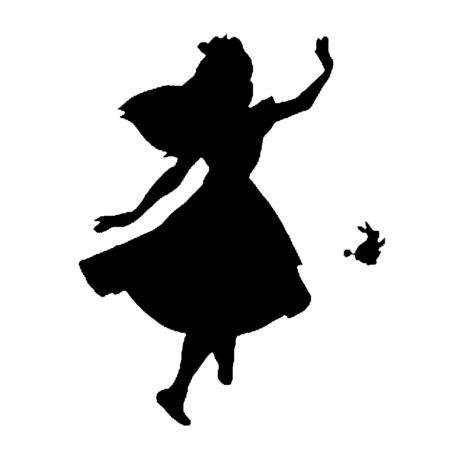

In [23]:
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

이제 문서 자체에서 단어를 카운트하는 기능을 워드 클라우드가 제공하니 그것을 사용해서 최빈 단어를 찾습니다.

In [27]:
wc = WordCloud(background_color = 'white', max_words = 2000, mask=alice_mask, stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

'Alice' 라는 단어가 가장 많이 등장했습니다.

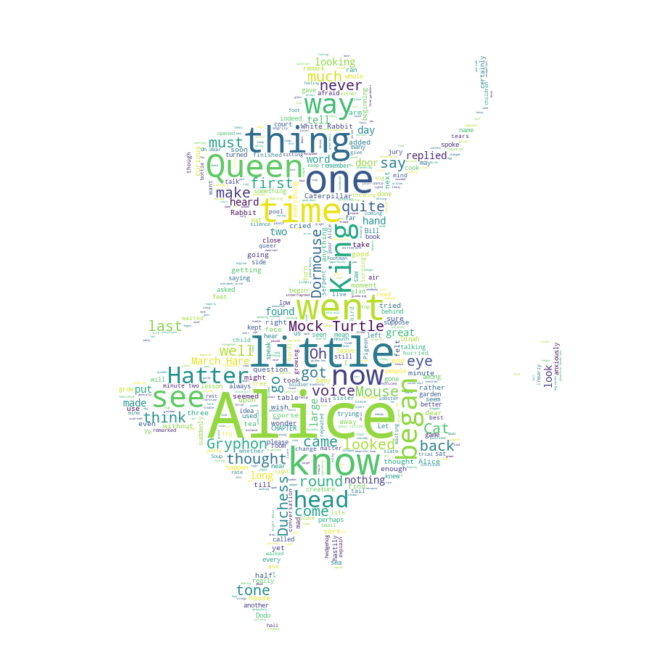

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()